## Les miserables Network
This undirected network contains co-occurances of characters in Victor Hugo's novel 'Les Misérables'. A node represents a character and an edge between two nodes shows that these two characters appeared in the same chapter of the the book. The weight of each link indicates how often such a co-appearance occured.

In [1]:
import networkx as nx
# To visualize in jupyter
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

### Read Data

In [2]:
les_nodes = pd.read_csv('les_miserable_node.csv')
les_edges = pd.read_csv('les_miserable_edge.csv')

In [17]:
les_nodes[:10]

,Id,Label,modularity_class
0,11,Valjean,1
1,48,Gavroche,8
2,55,Marius,6
3,27,Javert,7
4,25,Thenardier,7
5,23,Fantine,2
6,58,Enjolras,8
7,62,Courfeyrac,8
8,64,Bossuet,8
9,63,Bahorel,8


In [22]:
print(len(les_nodes)) # num of nodes

77


In [18]:
les_edges[:10]

,Source,Target,Weight
0,1,0,1
1,2,0,8
2,3,0,10
3,3,2,6
4,4,0,1
5,5,0,1
6,6,0,1
7,7,0,1
8,8,0,2
9,9,0,1


In [23]:
print(len(les_edges)) # num of edges

254


### Construct network

In [24]:
G = nx.Graph()
for idx,row in les_nodes.iterrows():
    G.add_node(row['Id'],Label=row['Label'],modularity_class=row['modularity_class'])
for idx,row in les_edges.iterrows():
    G.add_edge(row['Source'],row['Target'],Weight=int(row['Weight']))

In [25]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 77
Number of edges: 254
Average degree:   6.5974


### Export Data

In [26]:
nx.write_gexf(G,'Les_Miserables.gexf')

### Visualization

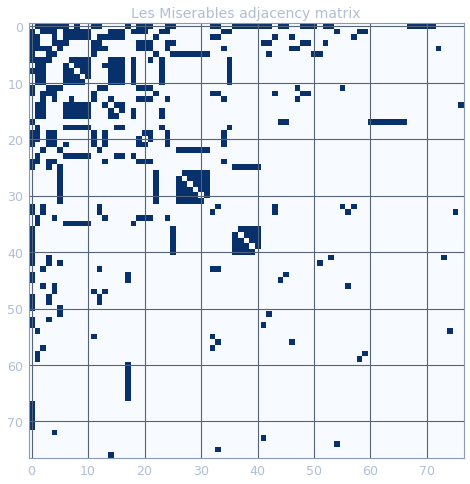

In [27]:
#show adjacency matrix
A = nx.to_numpy_matrix(G, dtype=np.bool)#adjacency matrix
plt.figure(1, figsize=(8, 8))# control figure size
plt.imshow(A,
           cmap="Blues",# color mapa
           interpolation="none"
           )
plt.title('Les Miserables adjacency matrix', fontsize=14);

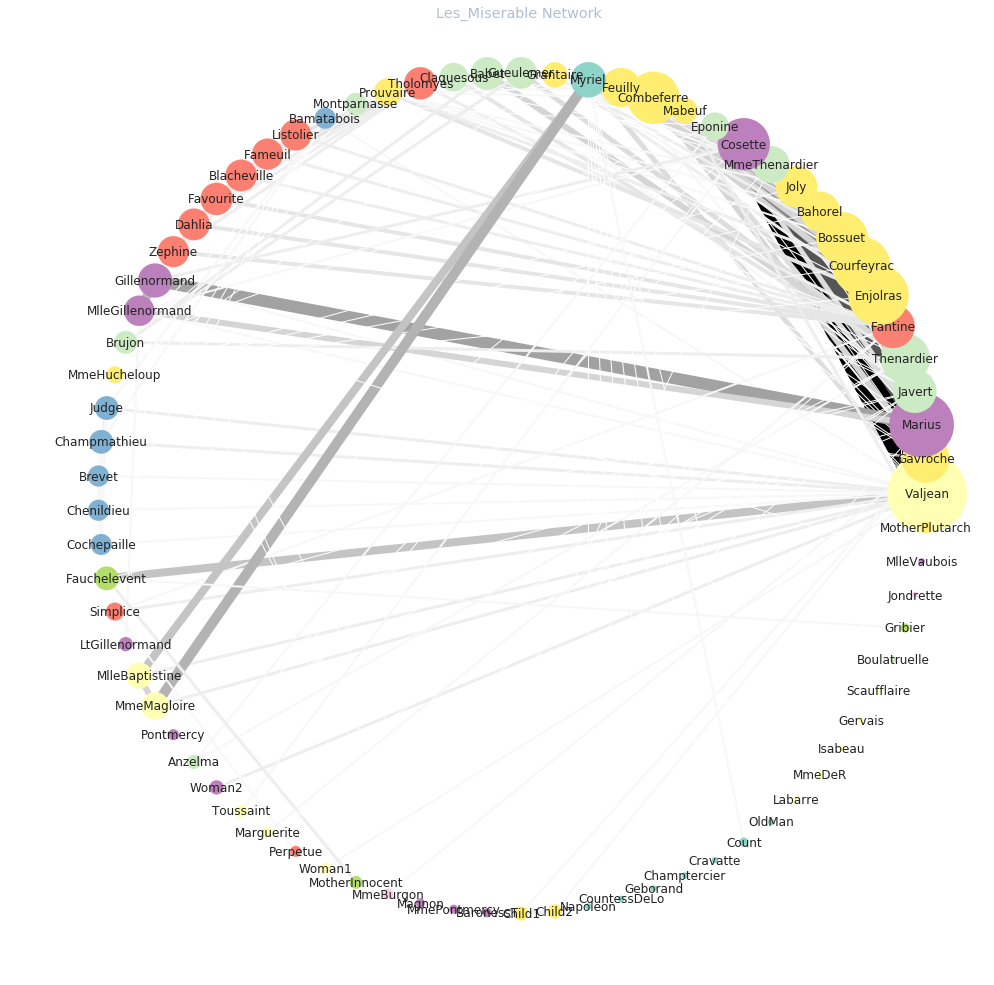

In [61]:
dig = dict(nx.degree(G,weight='Weight')) # degree of network
d = np.array(list(dig.values()))
modul = nx.get_node_attributes(G,'modularity_class')
weight = nx.get_edge_attributes(G,'Weight')

# pos=nx.spring_layout(G,iterations=200,k=2) # positions for all nodes
pos=nx.circular_layout(G,scale=1) # positions for all nodes
# k = Optimal distance between nodes (default = 1/sqrt(n)), 
# iterations = Number of iterations of spring-force relaxation

plt.figure(figsize=(13,13)) #Control figure size
nx.draw(G,pos,labels=nx.get_node_attributes(G,'Label') # Give label using attributes
        ,node_size = d*40 # node size
        ,node_color=list(modul.values()) # data for node color
        ,font_size=12 # labelsize
        ,cmap=plt.cm.Set3 # color_map for node
        ,edge_color=list(weight.values()) # data for edge color
        ,width=list(weight.values()) # edge width
        ,edge_cmap=plt.cm.gist_yarg # color_map for edge
       )
plt.title('Les_Miserable Network');
plt.savefig('Les_Miserable.png', format="PNG") # Save figure